# SAM Trends

In [1]:
#import my functions
import helpers.fileHandler as fh
import utils._modelDefinitions as _model
import utils.sstIndex as sst
import utils.pslIndex as psl
import utils.timePeriod as tp

In [2]:
import xarray
import matplotlib.pyplot as plt

In [3]:
import warnings
#warnings.filterwarnings('ignore')

In [4]:
experimentSet = ['002']
#experimentSet = _model.cesmRcp85  _model.cesmFullForcings

Data for climatology

In [5]:
pslClimatDs=fh.loadModelData('CESM-LME', 'PSL', '0850cntl.001')

pslClimat=psl.calculateClimatology(pslClimatDs, 850, 2005)

pslClimat.load()

/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/PSL/
Files imported: 
 ['/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/PSL/b.e11.B1850C5CN.f19_g16.0850cntl.001.cam.h0.PSL.085001-184912.nc', '/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/PSL/b.e11.B1850C5CN.f19_g16.0850cntl.001.cam.h0.PSL.185001-200512.nc']


<xarray.Dataset>
Dimensions:  (time: 13872)
Coordinates:
  * time     (time) object 0850-01-31 00:00:00 ... 2005-12-31 00:00:00
Data variables:
    lat1     (time) float32 1.015e+05 1.018e+05 ... 1.018e+05 1.016e+05
    lat2     (time) float32 9.869e+04 9.825e+04 ... 9.766e+04 9.842e+04

In [6]:
pslClimatDs.close()

For each experiment in Full Forcings, calculate all the indeces

In [7]:
timePIndeces=dict()

for experiment in experimentSet:
    print(experiment)
    pslDs = fh.loadModelData('CESM-LME', 'PSL', experiment)
    pslIndex, pslLatDa = psl.calculateSamIndex(pslDs, pslClimat)
    pslIndex.assign_attrs(climatology='calculated based on 850-2005 climatology from the control run')
    #indeces.to_netcdf('results/cesmMonthlyIndeces/' + experiment + '.nc')

    
# RCP8.5 extensions are a special case

    if experiment in ['002','003', '008', '009']:

        #pre2005Ds = xarray.load_dataset('results/cesmMonthlyIndeces/' + experiment + '.nc')
        
        experiment = 'LME.'+experiment 
        
        print(experiment)

        pslDs = fh.loadModelData('CESM-LME', 'PSL', experiment)

        extensionIndex, extensionLat =psl.calculateSamIndex(pslDs, pslClimat)

        pslIndex=xarray.concat(
            #(pre2005Ds[[keys for keys in extensionIndex.data_vars]],
            (pslIndex,
             extensionIndex),
            'time'
        )
        

        pslLatDa=xarray.concat([pslLatDa, extensionLat], 'time')

        pslIndex.assign_attrs(climatology='calculated based on 850-1850 climatology')

    
    #timePIndeces[experiment] = tp.averageForTimePeriod(pslIndex)

002
/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/PSL/
Files imported: 
 ['/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/PSL/b.e11.BLMTRC5CN.f19_g16.002.cam.h0.PSL.085001-184912.nc', '/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/PSL/b.e11.BLMTRC5CN.f19_g16.002.cam.h0.PSL.185001-200512.nc']


/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 578 times more chunks
  return self.array[key]
/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 578 times more chunks
  return self.array[key]


LME.002
/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/PSL/
Files imported: 
 ['/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/PSL/b.e11.BRCP85C5CN.f19_g16.LME.002.cam.h0.PSL.200601-210012.nc']


/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 95 times more chunks
  return self.array[key]
/Users/ajs/opt/anaconda3/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing with an out-of-order index is generating 95 times more chunks
  return self.array[key]


In [8]:
pslIndex

<xarray.DataArray 'sam' (time: 15012)>
dask.array<concatenate, shape=(15012,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0850-01-31 00:00:00 ... 2100-12-31 00:00:00
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [9]:
pslLatAvDa=tp.averageForTimePeriod(pslLatDa)

['lat2', 'lat1']


In [15]:
pslLatAvDa.load()

<xarray.Dataset>
Dimensions:  (year: 1250)
Coordinates:
  * year     (year) int64 850 851 852 853 854 855 ... 2095 2096 2097 2098 2099
Data variables:
    lat2     (year) float64 0.5213 -0.3357 -0.2213 ... -0.7895 -0.6733 -1.111
    lat1     (year) float64 -0.5378 -0.06311 0.02407 ... 1.496 1.282 1.808
Attributes:
    lat1:     -40
    lat2:     -65

In [11]:
pslLatAvDa.to_netcdf('results/samLat'+experiment+'.csv')

No handles with labels found to put in legend.


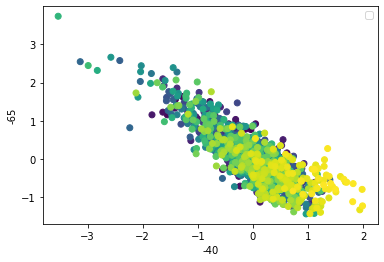

In [12]:
toPlot = pslLatAvDa.isel(year=range(0,1250))

x = toPlot.lat1
y = toPlot.lat2

plt.scatter(x,y, c=range(0,1250))

plt.xlabel('-40')

plt.ylabel('-65')

plt.legend()

In [ ]:
plt.figure(figsize=(12,12))

pslLatAvDa.lat1.plot()

(-1*pslLatAvDa.lat2).plot()

In [ ]:
pslLatDa.attrs